Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
library(dplyr) #se usa la libreria para poder utilizar la función Select.
airbnb <- select(airbnb, 'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
airbnb


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.7079955
Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.7050064
Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.7068231
Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.6973054
Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.7011554
Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.7050954
Madrid,Entire home/apt,,2,1.0,1,1,70,NA,1,0,100,40.40898,-3.6982515
Madrid,Private room,La Latina,2,1.5,1,1,30,NA,1,0,80,40.40836,-3.7040433
Madrid,Entire home/apt,Embajadores,4,1.0,1,2,57,NA,2,8,98,40.41162,-3.7032811
Madrid,Entire home/apt,La Latina,2,1.0,1,1,59,NA,1,0,95,40.40734,-3.7070192


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
library(tidyverse)
#Hacemos aplicamos un filtro para hacer el nuevo dataframe: "df_madrid" con sus respectivas condiciones:
df_madrid <- filter(airbnb, City=="Madrid" & Room.Type=="Entire home/apt" & Neighbourhood!="")
#Eliminamos las columnas que ya no son necesarias:
df_madrid <- select(df_madrid, -Room.Type,-City)
head(df_madrid,5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
#Usamos la función mutate(): para crear una nueva columna con lo que nos pide:
df_madrid <- mutate(df_madrid, Square.Meters=Square.Feet*0.092903)
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
paste("¿Cuantos tienen NA en Square.Meters?")
Square.Meters_NA <- sum(is.na(df_madrid$Square.Meters)) #suma de los que son NA
Square.Meters_NA
paste("¿Que porcentaje de los apartamentos no muestran los metros cuadrados?:")
NA_porcentaje <- paste("El porcentaje es:", ((Square.Meters_NA)/nrow(df_madrid))*100, "%") #calculo del porcetaje
NA_porcentaje

[1] "¿Cuantos tienen NA en Square.Meters?"

[1] 5254

[1] "¿Que porcentaje de los apartamentos no muestran los metros cuadrados?:"

[1] "El porcentaje es: 93.8046777361185 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
paste("¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?")
#se suman los valores que son 0 y los que son diferente a NA:
cero_cantidad <- sum(df_madrid$Square.Meters == 0 & !is.na(df_madrid$Square.Meters))
paste("Los Square.Meters con 0 existentes: ", cero_cantidad)
cero_porcentaje <- paste("El porcentaje es:", ((cero_cantidad)/nrow(df_madrid))*100, "%") #calculo del porcetaje
cero_porcentaje

[1] "¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?"

[1] "Los Square.Meters con 0 existentes:  128"

[1] "El porcentaje es: 2.28530619532226 %"

Reemplazar todos los 0m^2 por NA 

In [7]:
#Valores antes de ejecutar el cambio de 0 a NA:
paste("Los Square.Meters con valor de 0: ", cero_cantidad)
paste("Los Square.Meters con valor de NA: ", Square.Meters_NA)

#Convertir los 0 a NA:
df_madrid <- df_madrid %>% mutate(Square.Meters=ifelse(Square.Meters==0, NA, Square.Meters))

#Para corroborar de que se aplico correctamente la condición, usamos el codigo anterior del porcentaje de NA:
paste("¿Cuantos tienen NA en Square.Meters?")
Square.Meters_NA <- sum(is.na(df_madrid$Square.Meters)) #suma de los que son NA
Square.Meters_NA

[1] "Los Square.Meters con valor de 0:  128"

[1] "Los Square.Meters con valor de NA:  5254"

[1] "¿Cuantos tienen NA en Square.Meters?"

[1] 5382

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 5382 rows containing non-finite values (stat_bin)."

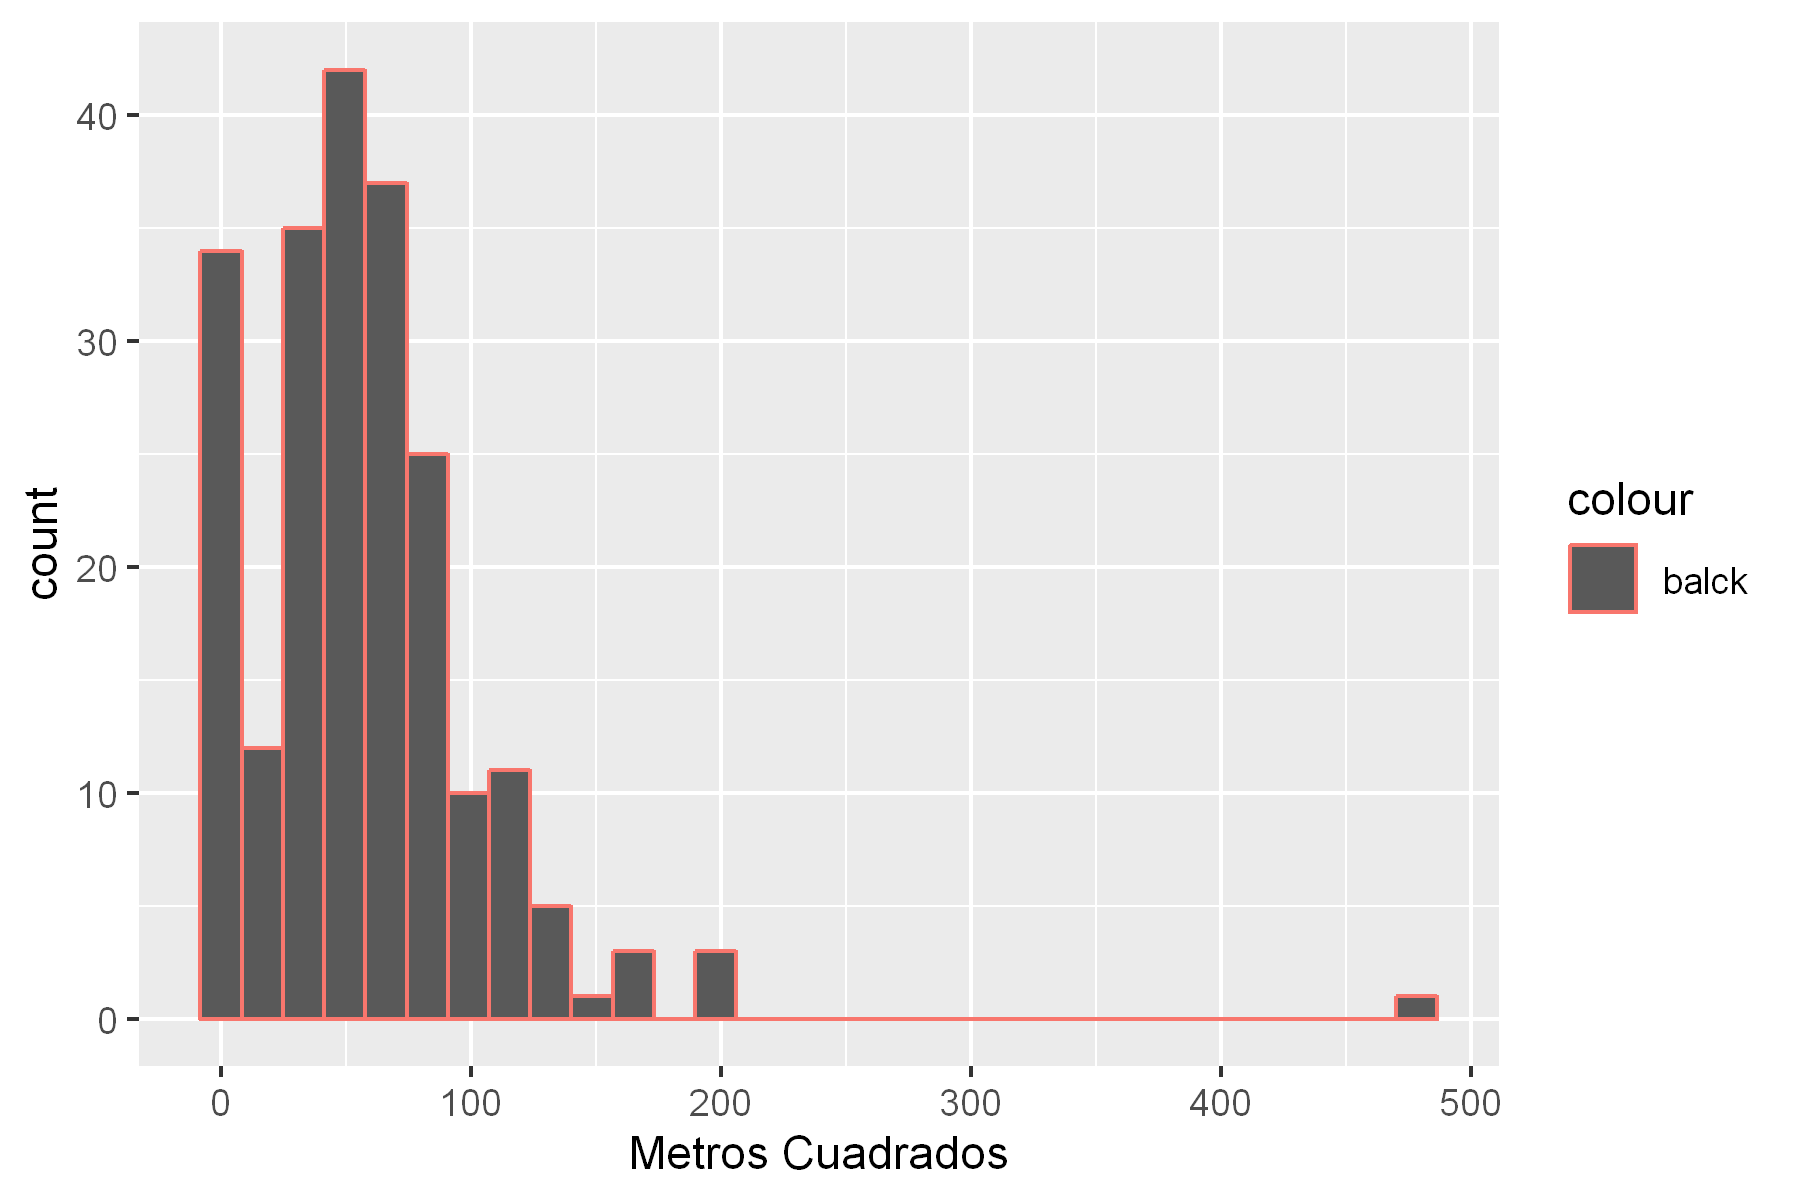

In [8]:
library(ggplot2)
ggplot(data=df_madrid)+
    geom_histogram(mapping=aes(x=Square.Meters, color="balck"))+
    labs(x="Metros Cuadrados")

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [9]:
cantidad <- sum(df_madrid$Square.Meters < 20 & !is.na(df_madrid$Square.Meters))
paste("Valores con menos de 20m^2: ", cantidad)

#NA antes:
paste("Cantidad de NA actualmente en Metros cuadrados: ", Square.Meters_NA)

#Convertir los valores menos de 20m^2 a NA:
df_madrid <- df_madrid %>% mutate(Square.Meters=ifelse(Square.Meters<20, NA, Square.Meters))

#Despues:
#Para corroborar de que se aplico correctamente la condición, usamos el codigo anterior del porcentaje de NA:
paste("¿Cuantos tienen NA en Square.Meters?")
Square.Meters_NA <- sum(is.na(df_madrid$Square.Meters)) #suma de los que son NA
Square.Meters_NA

[1] "Valores con menos de 20m^2:  45"

[1] "Cantidad de NA actualmente en Metros cuadrados:  5382"

[1] "¿Cuantos tienen NA en Square.Meters?"

[1] 5427

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [10]:
#Agrupamos los barrios y filtramos los que no son valores NA, ni igual a 0:
#del dataframe tomamos las columna de interes:
Neighbourhood_All <- df_madrid[c("Neighbourhood","Square.Meters")] %>% 
    group_by(Neighbourhood) %>% 
    summarise(sum(na.omit(Square.Meters))) %>%
    filter(`sum(na.omit(Square.Meters))`==0)

#Ver barrios -> Neighbourhood_All

#Aplicamos el Filtro que nos seleccionara todos los barrios que son diferente a NA del dataframe:
df_madrid <- df_madrid %>%
    filter(!Neighbourhood %in% (Neighbourhood_All$Neighbourhood))
count(df_madrid) 
length(unique(df_madrid$Neighbourhood))

n
4901


[1] 38

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



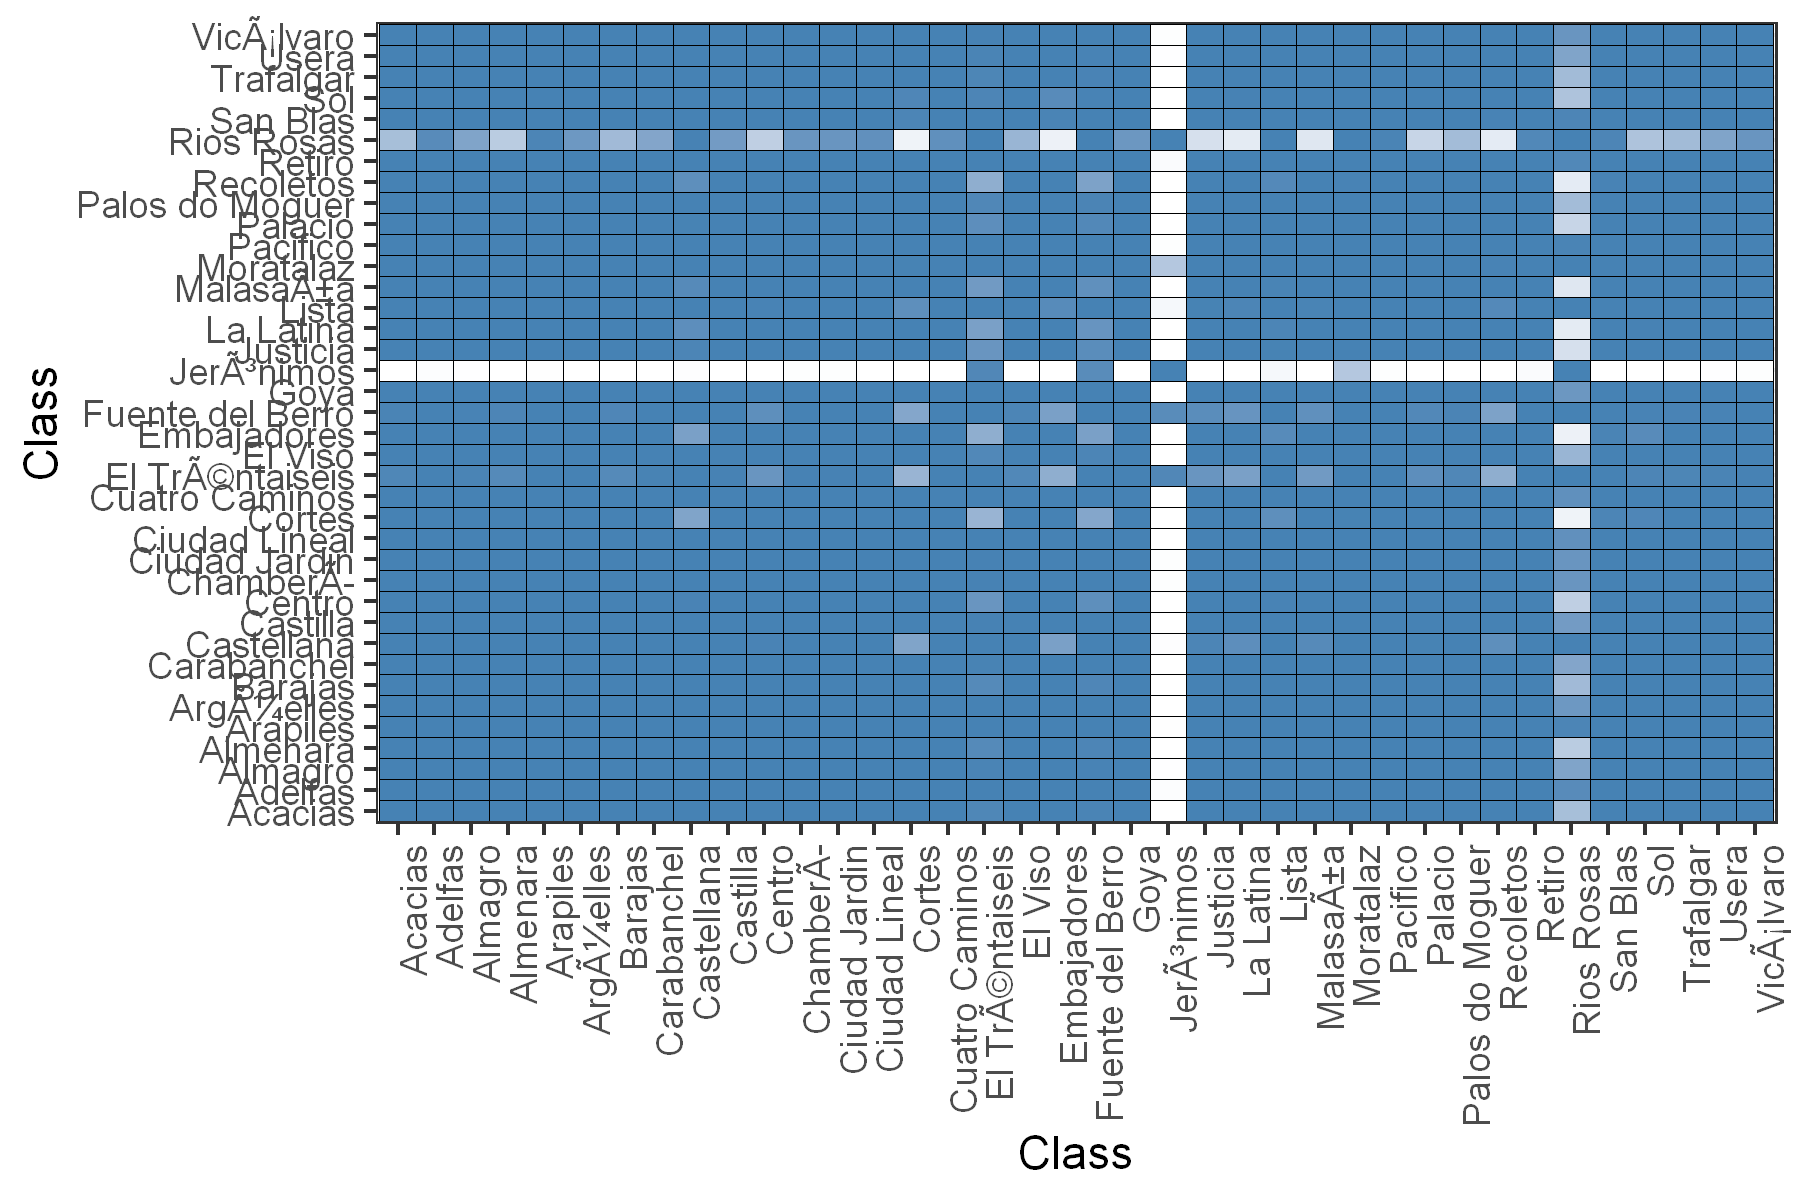

In [11]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


package 'dslabs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Manuel Cors\AppData\Local\Temp\RtmpcTjs3U\downloaded_packages

  There is a binary version available but the source version is later:
           binary source needs_compilation
dendextend 1.15.1 1.16.0             FALSE



installing the source package 'dendextend'



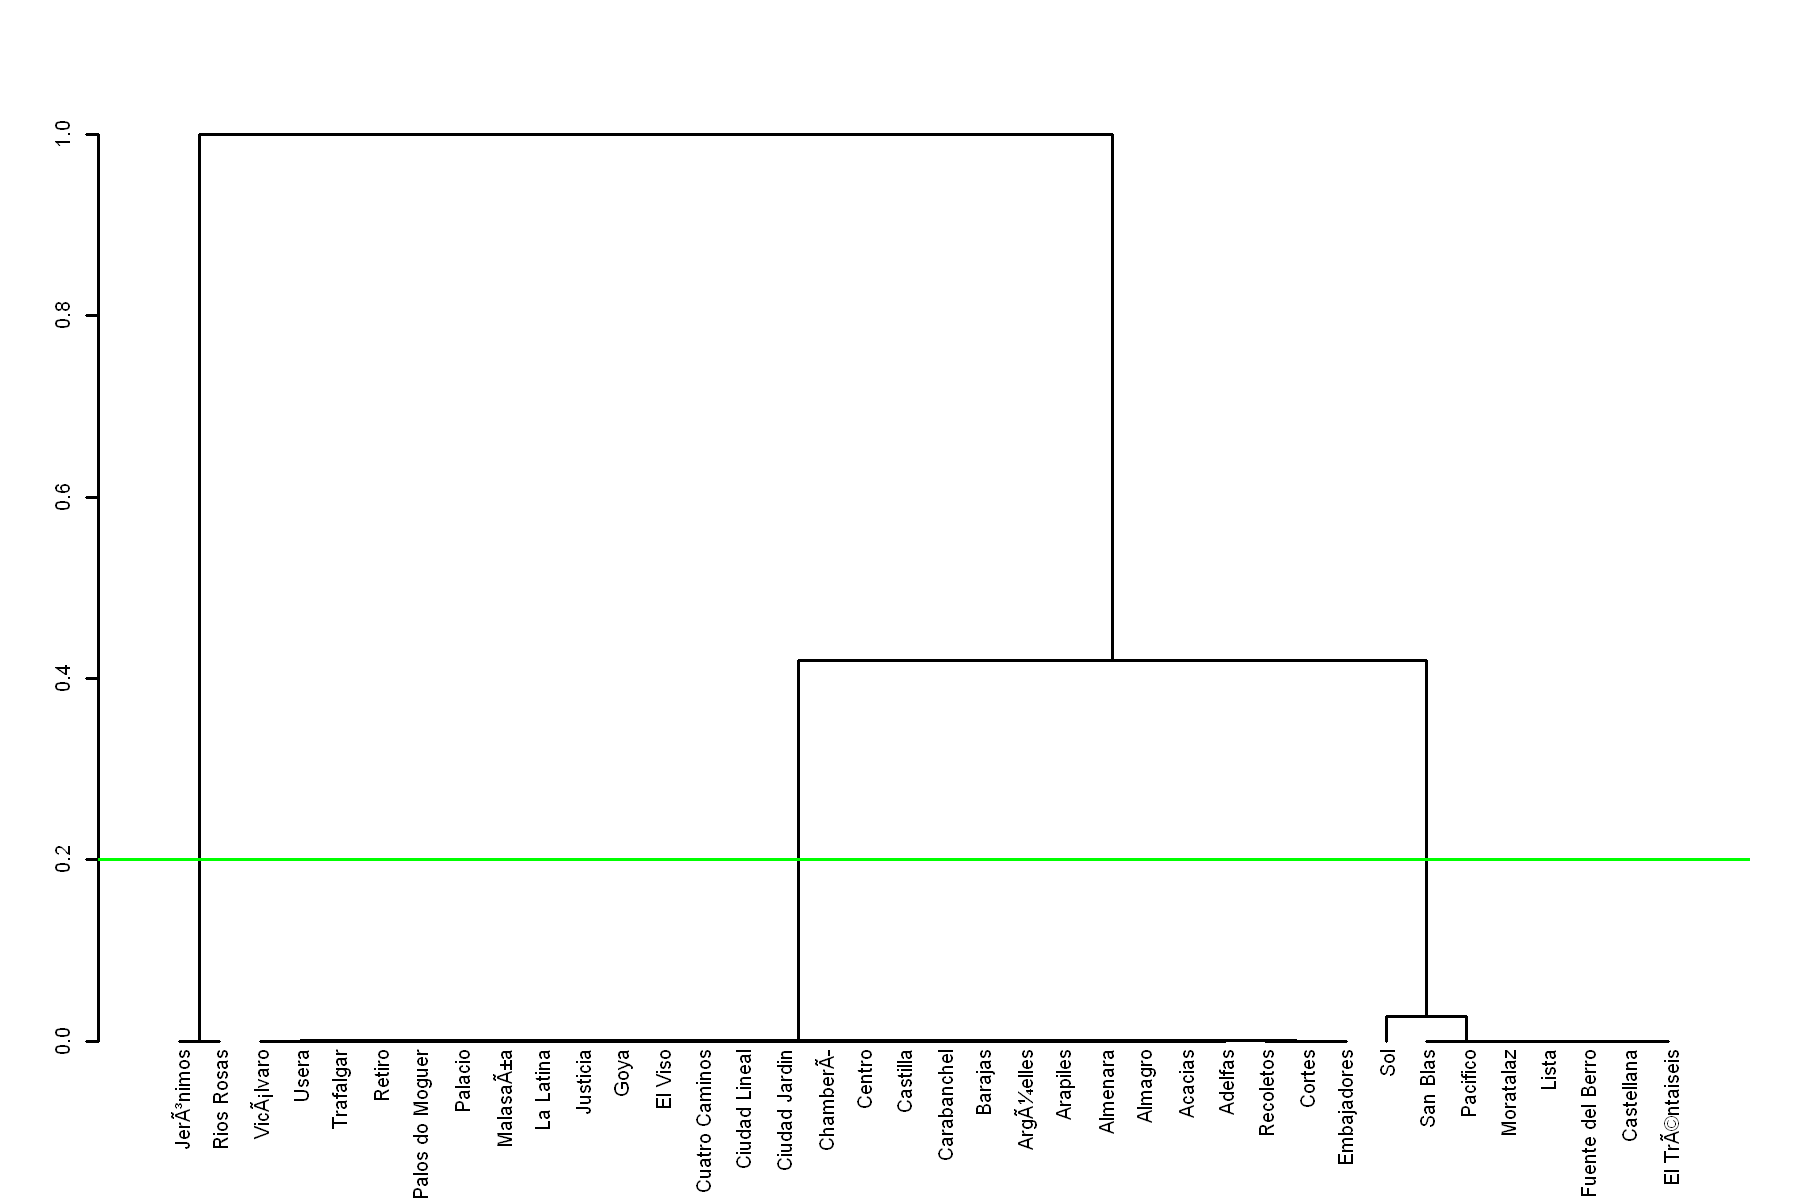

In [12]:
library(cluster)
install.packages("dslabs")
install.packages("dendextend")

distancia = as.dist(1 - resm)
hc = hclust(distancia, method="complete")
dendrograma = as.dendrogram(hc)
par(cex=0.4)
plot(dendrograma)
abline(h=0.2, col="green")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

Por lo que nos muestra el dendrograma es aconsejable dejarlo en 0.2 porque hay 3 clusters, cubre gran parte de barrios.

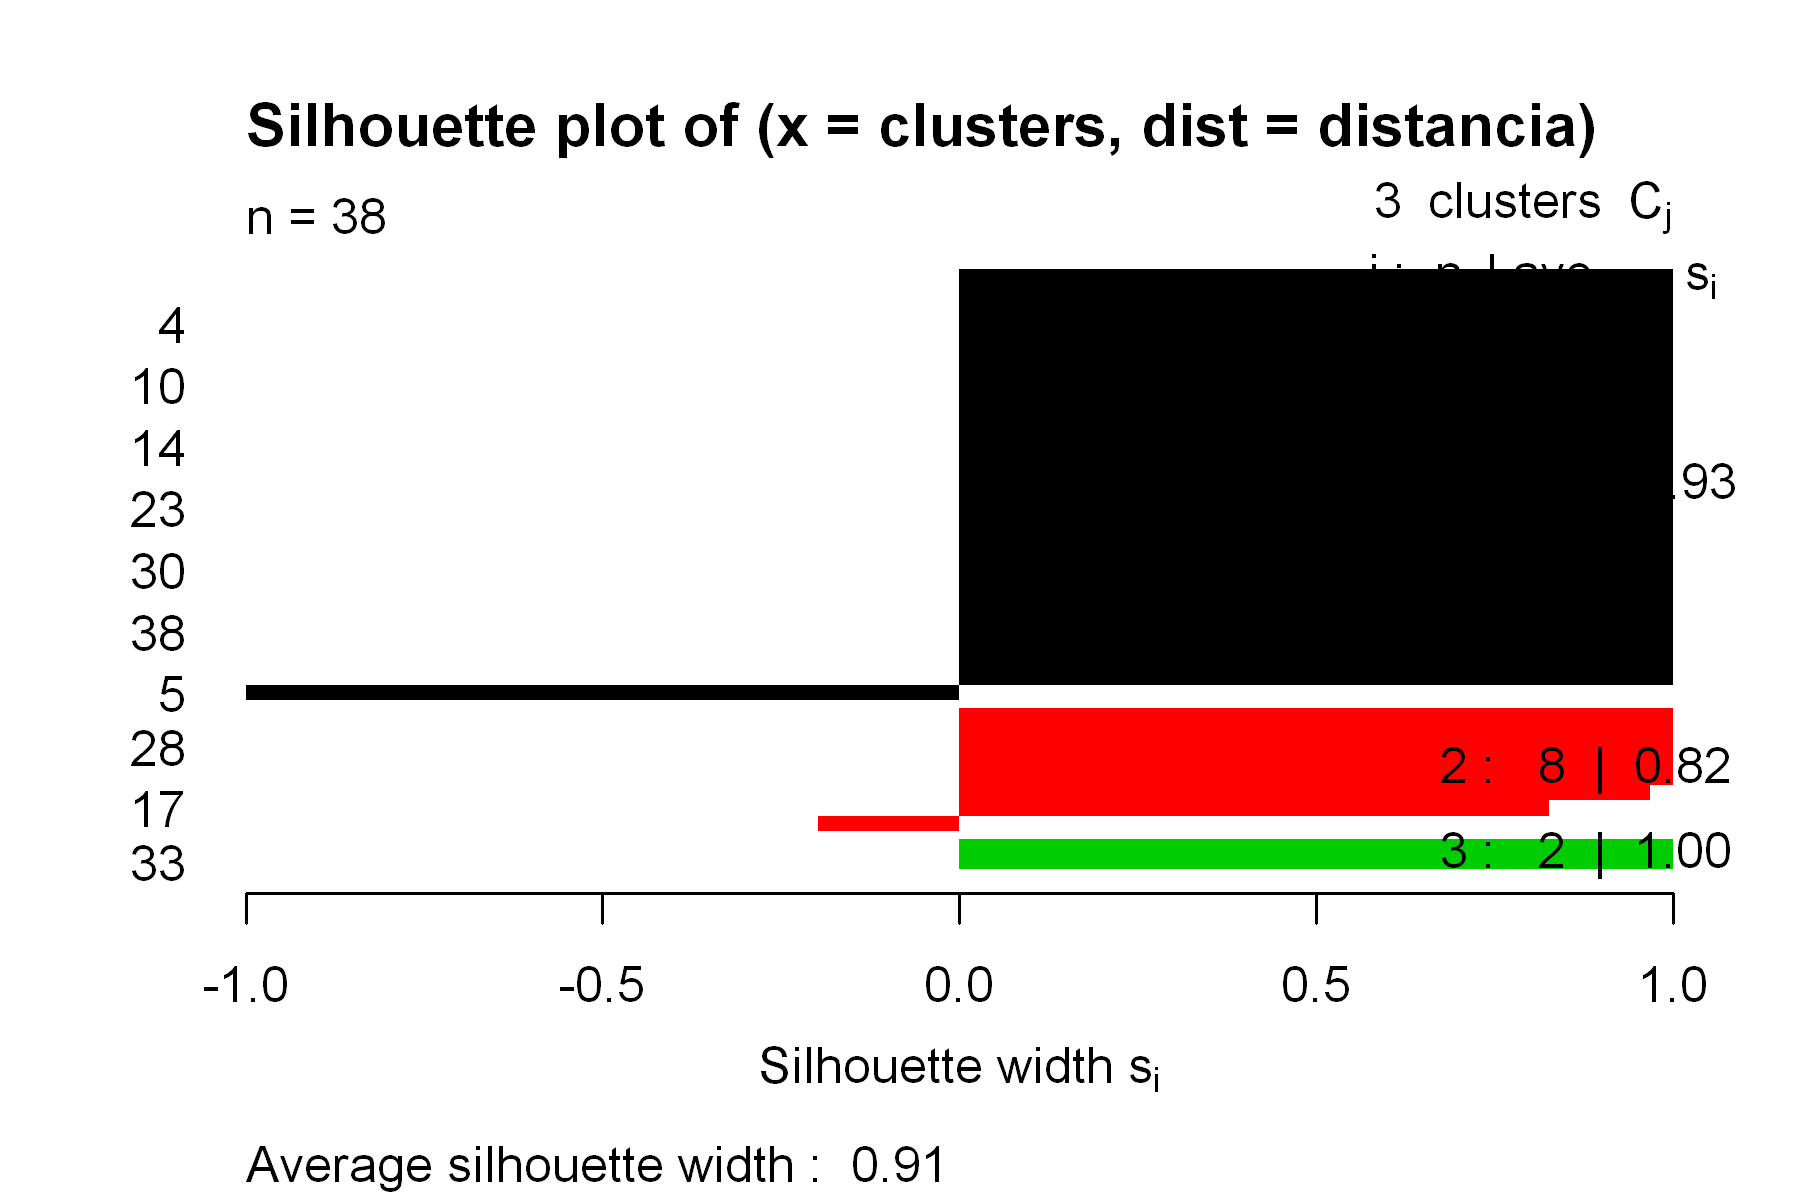

In [13]:
#Para corroborar si en 3 clusters es mejor usaremos Silhouette:
clusters <-cutree(hc,h=0.2)
ss <- silhouette(clusters, distancia)
plot(ss,col=1:max(clusters),border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [14]:
#Square Meters que no son NA:
Square.Meters_No_NA <- df_madrid[!is.na(df_madrid$Square.Meters),]
dim(Square.Meters_No_NA)

#Agregamos los barrios para el nuevo dataframe:
Neighbourhood<-c("Acacias","Adelfas","Almagro","Almenara","Arapiles",
                 "Argüelles","Barajas","Carabanchel","Castellana","Castilla",
                 "Centro","Chamberí","Ciudad Jardin","Ciudad Lineal","Cortes",
                 "Cuatro Caminos","El Tréntaiseis","El Viso","Embajadores",
                 "Fuente del Berro","Goya","Jerónimos","Justicia","La Latina","Lista",
                 "Malasaña","Moratalaz","Pacifico","Palacio","Palos do Moguer","Recoletos",
                 "Retiro","Rios Rosas","San Blas","Sol","Trafalgar","Usera","Vicálvaro")


#Creamos el dataframe:
df_Clusters <- data.frame(Neighbourhood=Neighbourhood, neighb_id=clusters)
dim(df_Clusters)
df_madrid_Clusters = merge(Square.Meters_No_NA, df_Clusters, by="Neighbourhood")
dim(df_madrid_Clusters)
head(df_madrid_Clusters)

[1] 174  13

[1] 38  2

[1] 140  14

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
Acacias,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.95596,1
Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596,1
Almagro,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98181,1
Almenara,4,1.0,0,1,52,431,2,0,53,40.47226,-3.692849,40.04119,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [15]:
#Parámetros inciales
set.seed(12)
idx <- sample(1:nrow(Square.Meters_No_NA),nrow(Square.Meters_No_NA)*0.7)

#Pasamos a crear Train y Test:
Square.Meters_No_NA.train <- Square.Meters_No_NA[idx,]
train <- Square.Meters_No_NA.train %>% nrow()
Square.Meters_No_NA.test <- Square.Meters_No_NA[-idx,]
test <- Square.Meters_No_NA.test %>% nrow()
paste("La cantidad en train son:", train)
paste("La cantidad de test son:", test)

[1] "La cantidad en train son: 121"

[1] "La cantidad de test son: 53"

In [17]:
#Creamos el modelo:
modelo <- lm(Square.Meters_No_NA.train, 
            formula=Square.Meters~Accommodates+Bathrooms+Bedrooms+Beds+Price+Review.Scores.Rating)
summary(modelo)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Review.Scores.Rating, data = Square.Meters_No_NA.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.653 -12.274  -2.861   8.673  84.207 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -17.94739   22.93707  -0.782  0.43564    
Accommodates           2.51243    2.09878   1.197  0.23387    
Bathrooms             14.01138    5.00381   2.800  0.00604 ** 
Bedrooms              19.39867    3.50961   5.527 2.24e-07 ***
Beds                  -3.52733    2.17647  -1.621  0.10798    
Price                  0.08759    0.03468   2.526  0.01298 *  
Review.Scores.Rating   0.30361    0.24130   1.258  0.21099    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.88 on 109 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6781,	Adjusted R-squared:  0.6604 
F-statis

In [18]:
#contiuamos con las predicciones en test y train:
paste("Predicción Train:")
predict_train <- predict(modelo,Square.Meters_No_NA.train, )
caret::postResample(predict_train,Square.Meters_No_NA.train$Square.Meters)
paste("Predicción Test:")
predict_test <- predict(modelo,Square.Meters_No_NA.test, )
caret::postResample(predict_test,Square.Meters_No_NA.test$Square.Meters)

[1] "Predicción Train:"

RMSE   Rsquared        MAE 
20.2386992  0.6780879 14.5119335

[1] "Predicción Test:"

RMSE   Rsquared        MAE 
43.1578967  0.7153516 19.5204861

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

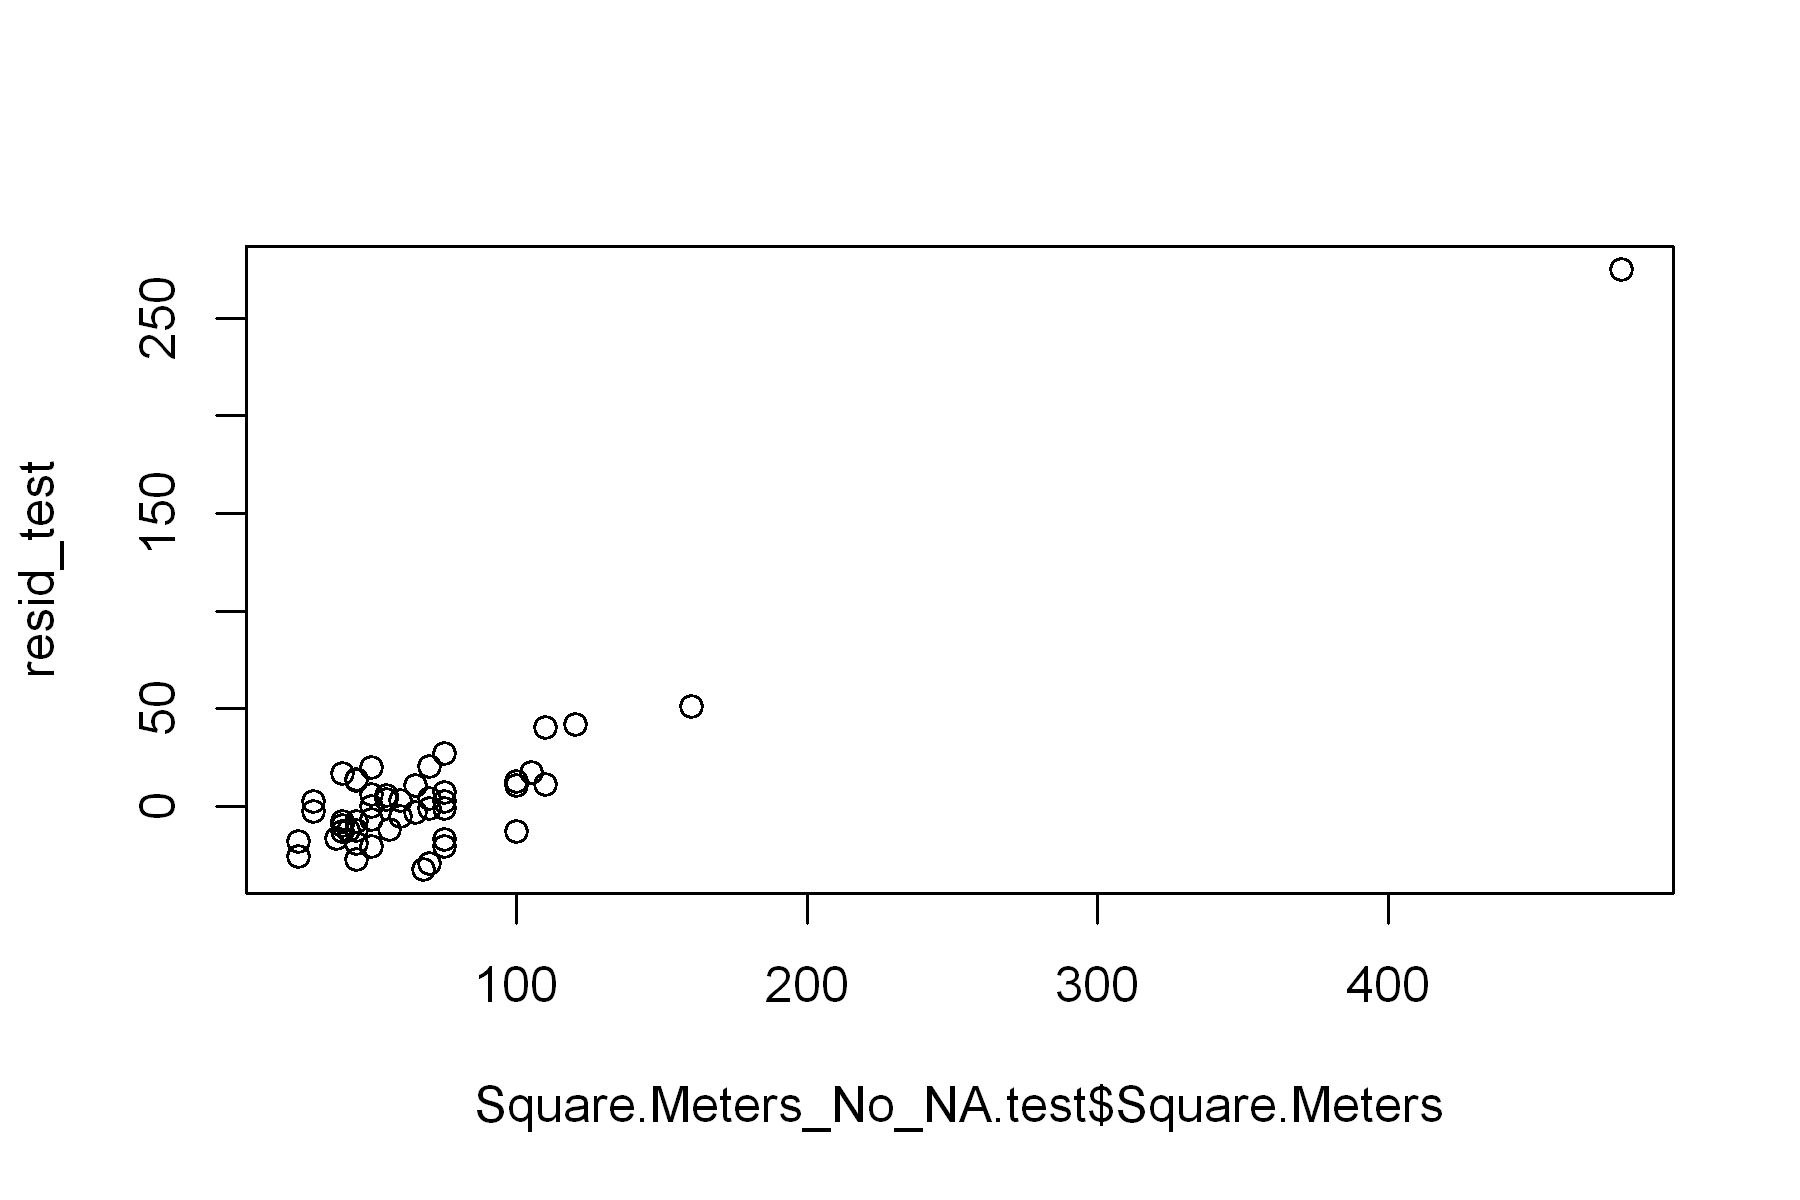

In [19]:
resid_test <- Square.Meters_No_NA.test$Square.Meters - predict_test
plot(Square.Meters_No_NA.test$Square.Meters,resid_test)

Conclusión: El modelo no es muy bueno, como podemos observar en distribución de residuos es que los al ser muy pocos datos que no son NA por lo que no se puede hacer un calculo mejor.

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [20]:
df_madrid_sol <- Square.Meters_No_NA %>% filter(Neighbourhood=="Sol")
df_madrid_sol

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Sol,6,1,2,3,102,807,1,11,80,40.41977,-3.699911,74.97272
Sol,6,2,2,3,140,1076,3,10,94,40.41611,-3.707456,99.96363
Sol,4,1,2,3,95,947,2,10,93,40.41487,-3.706138,87.97914
Sol,4,1,1,2,95,700,2,15,90,40.41552,-3.706460,65.03210
Sol,2,1,1,1,65,431,2,0,90,40.41888,-3.703460,40.04119
Sol,2,1,1,1,65,269,2,0,93,40.41689,-3.707419,24.99091
Sol,4,1,1,1,100,753,2,10,87,40.41507,-3.703358,69.95596
Sol,5,1,2,5,100,753,2,5,91,40.41609,-3.706012,69.95596
Sol,4,1,1,2,70,915,2,8,100,40.41794,-3.701260,85.00624
Sol,2,1,1,1,77,431,2,11,80,40.41456,-3.704374,40.04119


In [21]:
predict_piso <- predict(modelo, data.frame(Accommodates=6,Bathrooms=1,Bedrooms=3,Beds=3,Price=80,Review.Scores.Rating=80,
                                     Guests.Included=2,Extra.People=10,neighb_id=as.factor(2)))

paste("¿Cuantos metros cuadrados tendría?: ",predict_piso)


predict_piso2 <- predict(modelo, data.frame(Accommodates=6,Bathrooms=1,Bedrooms=4,Beds=3,Price=80,Review.Scores.Rating=80,
                                     Guests.Included=2,Extra.People=10,neighb_id=as.factor(2)))
paste("¿Como varía sus metros cuadrados con cada habitación adicional?: ",predict_piso2-predict_piso)

[1] "¿Cuantos metros cuadrados tendría?:  90.0487825590484"

[1] "¿Como varía sus metros cuadrados con cada habitación adicional?:  19.3986735041786"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [22]:
#Nuevo dataframe con valores en Square Meters diferentes a NA:
df_madrid_nuevo <- df_madrid_Clusters[!is.na(df_madrid_Clusters$Square.Meters),]

#Nuevo dataframe con valores NA en Square Meters:
df_madrid_nuevo_NA <- df_madrid_Clusters[is.na(df_madrid_Clusters$Square.Meters),]

#Reemplazamos los valores NA de Square Meters:
df_madrid_nuevo_NA[,"Square.Meters"] <- predict(modelo, data.frame(Accommodates=df_madrid_nuevo_NA$Accommodates,
                                                                   Bathrooms=df_madrid_nuevo_NA$Bathrooms,
                                                         Bedrooms=df_madrid_nuevo_NA$Bedrooms,Beds=df_madrid_nuevo_NA$Beds,Price=df_madrid_nuevo_NA$Price,
                                                         Review.Scores.Rating=df_madrid_nuevo_NA$Review.Scores.Rating,Guests.Included=df_madrid_nuevo_NA$Guests.Included,
                                                         Extra.People=df_madrid_nuevo_NA$Extra.People,neighb_id=df_madrid_nuevo_NA$neighb_id))
#Nuevo dataframe uniendo test y train:
df_madrid_nuevo = rbind(Square.Meters_No_NA.train,Square.Meters_No_NA.test)
dim(df_madrid_nuevo)
df_madrid_nuevo
#logramos hacer el reemplazo por que nos da las columnas y valores que son del dataframe inicial.

[1] 174  13

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
2537,Embajadores,3,1.0,1,2,85,700,2,8,93,40.40831,-3.703663,65.03210
2203,Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596
2582,MalasaÃ±a,2,1.0,0,1,75,377,1,0,67,40.42902,-3.703978,35.02443
1767,Cortes,6,1.0,2,5,60,538,2,30,88,40.41302,-3.694232,49.98181
883,La Latina,4,1.0,2,4,70,484,2,15,85,40.41182,-3.709931,44.96505
3825,La Latina,4,1.0,1,2,50,646,2,5,94,40.40922,-3.706288,60.01534
4832,Sol,10,2.0,5,8,300,1615,7,20,95,40.41444,-3.706969,150.03834
2225,Cortes,6,2.0,2,4,500,807,4,15,96,40.41364,-3.697923,74.97272
3557,MalasaÃ±a,2,1.0,1,2,50,291,1,0,87,40.42600,-3.712278,27.03477
3509,MalasaÃ±a,6,1.0,2,3,68,646,4,15,94,40.42360,-3.702581,60.01534


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [23]:
#Eliminamos las columnas categoricas para quedarnos solamente con las numericas:
df_madrid_nuevo <- df_madrid_nuevo[c("Accommodates","Bathrooms","Bedrooms","Beds","Price","Review.Scores.Rating","Latitude",
                                     "Longitude","Square.Meters")]
head(df_madrid_nuevo)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Review.Scores.Rating,Latitude,Longitude,Square.Meters
2537,3,1.0,1,2,85,93,40.40831,-3.703663,65.03210
2203,6,1.5,2,6,60,94,40.39912,-3.670071,69.95596
2582,2,1.0,0,1,75,67,40.42902,-3.703978,35.02443
1767,6,1.0,2,5,60,88,40.41302,-3.694232,49.98181
883,4,1.0,2,4,70,85,40.41182,-3.709931,44.96505
3825,4,1.0,1,2,50,94,40.40922,-3.706288,60.01534


In [24]:
#Eliminamos valores que contengan NA's:
df_madrid_nuevo_No_NA <- na.omit(df_madrid_nuevo)
head(df_madrid_nuevo_No_NA)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Review.Scores.Rating,Latitude,Longitude,Square.Meters
2537,3,1.0,1,2,85,93,40.40831,-3.703663,65.03210
2203,6,1.5,2,6,60,94,40.39912,-3.670071,69.95596
2582,2,1.0,0,1,75,67,40.42902,-3.703978,35.02443
1767,6,1.0,2,5,60,88,40.41302,-3.694232,49.98181
883,4,1.0,2,4,70,85,40.41182,-3.709931,44.96505
3825,4,1.0,1,2,50,94,40.40922,-3.706288,60.01534


Standard deviations (1, .., p=9):
[1] 2.839209216 0.667884810 0.451382034 0.355501054 0.272342477 0.238733076
[7] 0.162971367 0.070399788 0.003803285

Rotation (n x k) = (9 x 9):
                            PC1         PC2         PC3         PC4
Accommodates         -0.3442032  0.11471903 -0.22244275  0.21954233
Bathrooms            -0.3404491  0.04901407 -0.06049866 -0.46366180
Bedrooms             -0.3337898  0.27103455 -0.25899841  0.05967240
Beds                 -0.3296963  0.33808013 -0.27176756  0.56530225
Price                -0.3138887  0.31302791  0.88641578  0.11941821
Review.Scores.Rating -0.3351401 -0.44640419  0.04694245  0.02784128
Latitude             -0.3353164 -0.45381891  0.03113763  0.05364699
Longitude             0.3352684  0.45436587 -0.03195729 -0.05616784
Square.Meters        -0.3313854  0.29498499 -0.12646743 -0.62659620
                              PC5          PC6         PC7          PC8
Accommodates          0.201828317  0.155397967 -0.83365799 -0.1039064

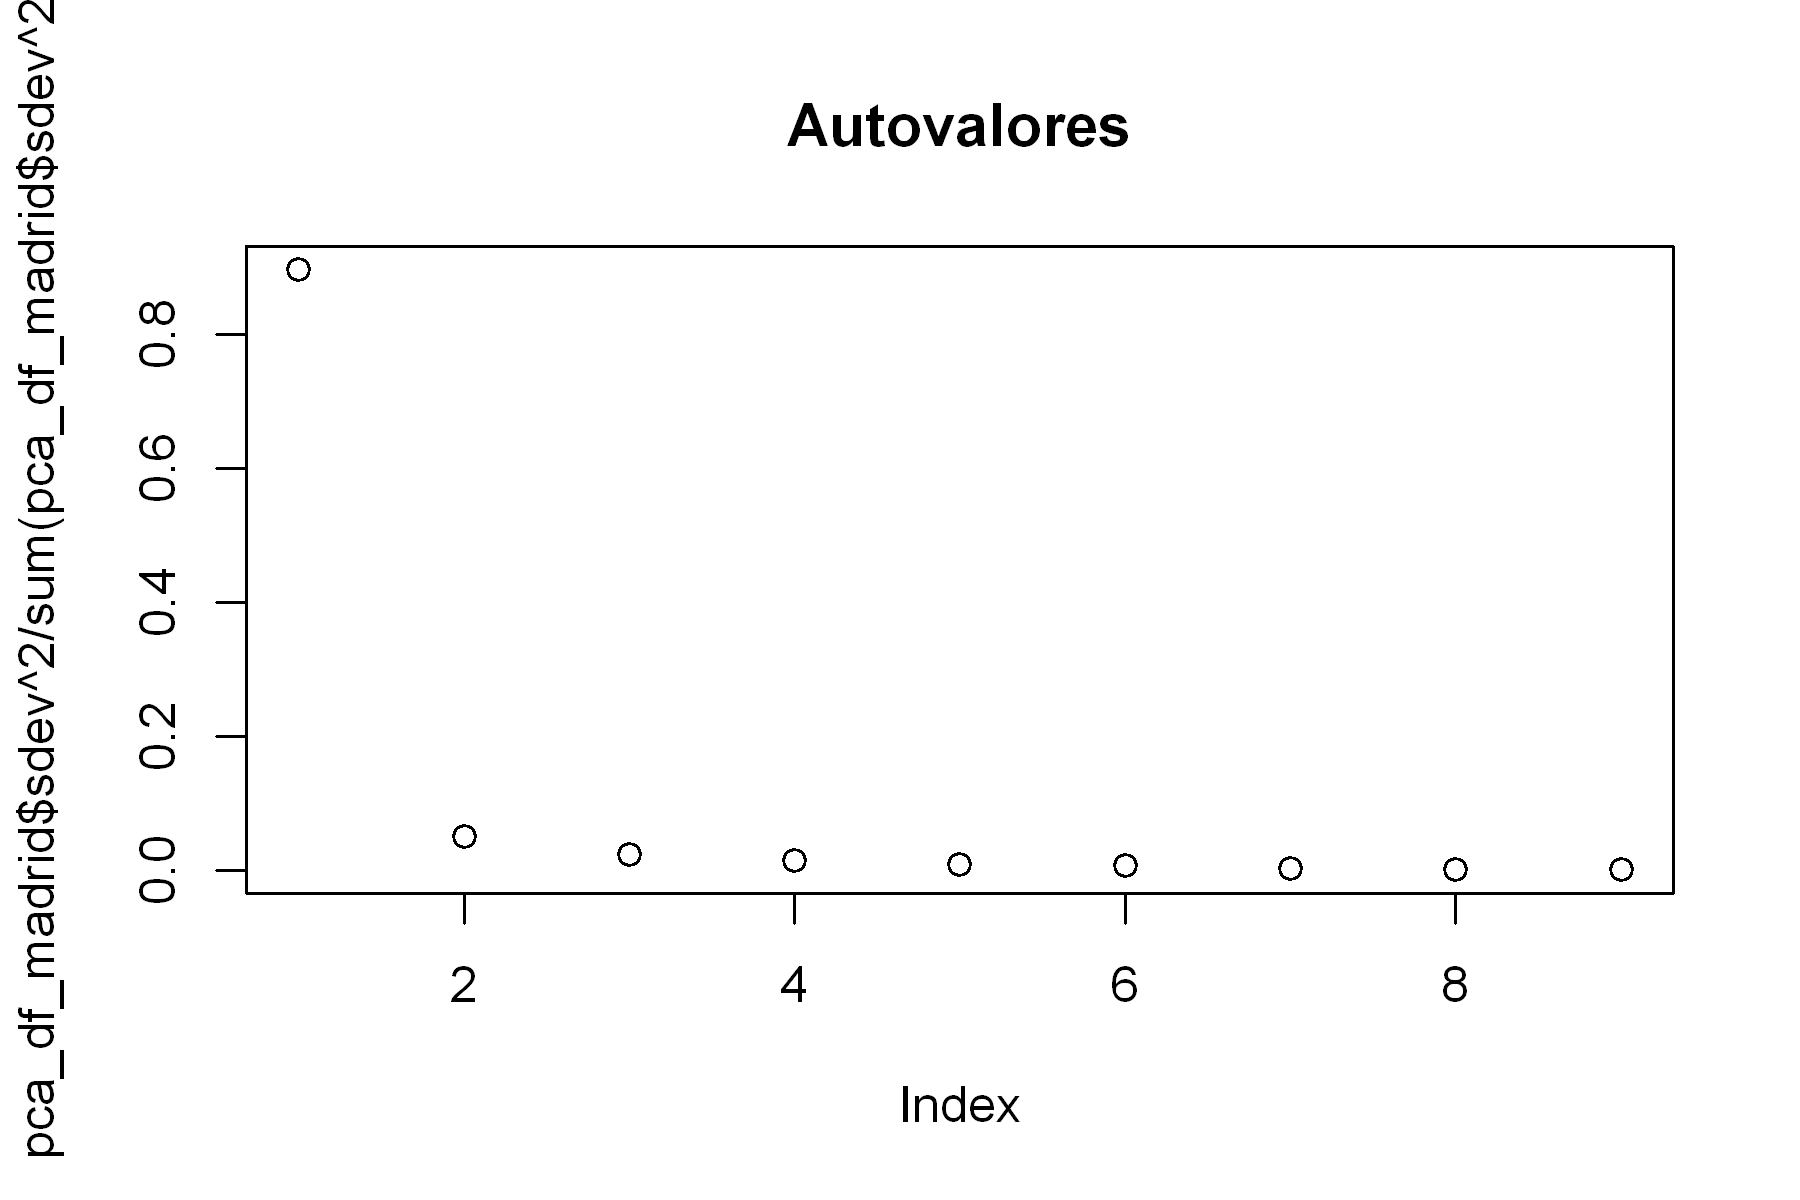

In [25]:
#Para calcular PCA usamos prcomp:
pca_df_madrid<-prcomp(df_madrid_nuevo_No_NA,center=FALSE,scale.=TRUE)
pca_df_madrid
plot(pca_df_madrid$sdev^2/sum(pca_df_madrid$sdev^2),main="Autovalores")

In [26]:
#Matriz de autovalores:
madrid_sdev <- pca_df_madrid$sdev
#Matriz de autovectores
pca_df_madrid$rotation

#Componentes y rango:
pca_componentes <- 3
rango <- pca_df_madrid$x[,1:pca_componentes]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Accommodates,-0.3442032,0.11471903,-0.22244275,0.21954233,0.201828317,0.155397967,-0.83365799,-0.103906493,-0.0043192156
Bathrooms,-0.3404491,0.04901407,-0.06049866,-0.46366180,0.170105600,0.762799574,0.22747902,-0.022252603,0.0029494810
Bedrooms,-0.3337898,0.27103455,-0.25899841,0.05967240,-0.860041622,0.026691583,0.05204207,0.037271440,0.0014594122
Beds,-0.3296963,0.33808013,-0.27176756,0.56530225,0.383157920,-0.074946821,0.48038169,0.019578458,0.0010220807
Price,-0.3138887,0.31302791,0.88641578,0.11941821,-0.040259470,0.004508455,-0.04229225,0.007966685,-0.0007064850
Review.Scores.Rating,-0.3351401,-0.44640419,0.04694245,0.02784128,-0.054336461,-0.150425853,0.13050088,-0.801751849,-0.0029614975
Latitude,-0.3353164,-0.45381891,0.03113763,0.05364699,-0.002884489,-0.075495085,0.01878295,0.416556022,-0.7058216369
Longitude,0.3352684,0.45436587,-0.03195729,-0.05616784,0.001446552,0.077884783,-0.01239335,-0.411063193,-0.7083614826
Square.Meters,-0.3313854,0.29498499,-0.12646743,-0.62659620,0.198151817,-0.594344180,-0.02161459,0.039678996,0.0001662381


In [27]:
#Apartamento:
piso<-data.frame(Accommodates=4,Bathrooms=1,Bedrooms=2,Beds=3,Price=80, Review.Scores.Rating=90,Latitude=40.41985,Longitude=-3.703648,Square.Meters=50)
#Creamos la predicción:
prediccion<-matrix(predict(pca_df_madrid,piso)[1:pca_componentes], nrow=1)
dist <- rep(NA,nrow(rango))
for (i in 1:nrow(rango)){
    dist[i]<-sum((prediccion-rango[i,])^2)
}
df_madrid_nuevo_No_NA[head(order(dist),5),]


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Review.Scores.Rating,Latitude,Longitude,Square.Meters
1187,4,1,2,3,85,94,40.40818,-3.708963,37.99733
3736,6,2,1,2,67,73,40.47335,-3.691577,60.01534
3764,4,1,2,3,65,93,40.40888,-3.713721,65.03210
2219,4,1,1,3,68,90,40.39691,-3.705202,74.97272
585,6,1,2,2,91,89,40.42417,-3.704949,69.95596


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?